In [18]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
import pickle

In [20]:
nfip_claims_ML =pd.read_csv('/Users/yaseminerguezel/neuefische/florita/data/nfip_claims_ML.csv')

In [4]:
nfip_claims_ML.head()

,Unnamed: 0,basementEnclosureCrawlspace,condominiumIndicator,policyCount,countyCode,elevatedBuildingIndicator,elevationCertificateIndicator,floodZone,latitude,longitude,...,reportedZipcode,primaryResidence,totalinsurancecoverage,amountPaidonTotalClaim,new_elev_diff,floodzone_code,MonthOfLosss,BuildingsConstructionYear,LossRatio,claim_segmentation
0,0,1,N,1,24033,0,0,X,38,-77,...,20745,1.0,140000,0,0,X,1,1953,0.000000,0
1,1,0,N,1,30009,1,0,AE,45,-109,...,59068,1.0,150000,593,0,A,7,1975,0.003953,1
2,2,0,N,1,48201,0,3,AE,29,-95,...,77025,1.0,50000,0,0,A,6,1983,0.000000,0
3,3,0,N,1,12103,1,0,AE,27,-82,...,33702,1.0,185000,0,-1,A,10,1969,0.000000,0
4,4,0,N,1,24029,1,0,AE,39,-76,...,21620,0.0,85000,35640,0,A,9,1980,0.419294,1


In [8]:
nfip_claims_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337885 entries, 0 to 2337884
Data columns (total 44 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Unnamed: 0                                  int64  
 1   agricultureStructureIndicator               int64  
 2   baseFloodElevation                          int64  
 3   basementEnclosureCrawlspace                 int64  
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 int64  
 7   countyCode                                  int64  
 8   communityRatingSystemDiscount               int64  
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   int64  
 11  elevationCertificateIndicator               int64  
 12  floodZone                                   object 
 13  houseWorship               

### Selecting final predictors for Machine Learning

In [5]:
SelectedColumns=['state','floodzone_code','rateMethod','policyCount','countyCode',
 'elevatedBuildingIndicator','latitude','longitude','locationOfContents','nonProfitIndicator', 'obstructionType',
 'postFIRMConstructionIndicator','yearOfLoss','reportedZipcode','primaryResidence','totalinsurancecoverage','new_elev_diff','MonthOfLosss',
 'BuildingsConstructionYear']

# Selecting final columns
DataForML=nfip_claims_ML[SelectedColumns]
DataForML.head()

,state,floodzone_code,rateMethod,policyCount,countyCode,elevatedBuildingIndicator,latitude,longitude,locationOfContents,nonProfitIndicator,obstructionType,postFIRMConstructionIndicator,yearOfLoss,reportedZipcode,primaryResidence,totalinsurancecoverage,new_elev_diff,MonthOfLosss,BuildingsConstructionYear
0,MD,X,7,1,24033,0,38,-77,0,0,999,0.0,2007,20745,1.0,140000,0,1,1953
1,MT,A,1,1,30009,1,45,-109,0,0,50,0.0,2011,59068,1.0,150000,0,7,1975
2,TX,A,1,1,48201,0,29,-95,0,0,10,1.0,2001,77025,1.0,50000,0,6,1983
3,FL,A,1,1,12103,1,27,-82,0,0,10,0.0,1996,33702,1.0,185000,-1,10,1969
4,MD,A,1,1,24029,1,39,-76,0,0,10,0.0,2003,21620,0.0,85000,0,9,1980


In [8]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['claim_segmentation']=nfip_claims_ML['claim_segmentation']

# Printing sample rows
DataForML_Numeric.head()

,policyCount,countyCode,elevatedBuildingIndicator,latitude,longitude,locationOfContents,nonProfitIndicator,obstructionType,postFIRMConstructionIndicator,yearOfLoss,...,rateMethod_F,rateMethod_G,rateMethod_P,rateMethod_Q,rateMethod_R,rateMethod_RatingEngine,rateMethod_S,rateMethod_T,rateMethod_W,claim_segmentation
0,1,24033,0,38,-77,0,0,999,0.0,2007,...,0,0,0,0,0,0,0,0,0,0
1,1,30009,1,45,-109,0,0,50,0.0,2011,...,0,0,0,0,0,0,0,0,0,1
2,1,48201,0,29,-95,0,0,10,1.0,2001,...,0,0,0,0,0,0,0,0,0,0
3,1,12103,1,27,-82,0,0,10,0.0,1996,...,0,0,0,0,0,0,0,0,0,0
4,1,24029,1,39,-76,0,0,10,0.0,2003,...,0,0,0,0,0,0,0,0,0,1


In [69]:
DataForML_Numeric.columns.all

<bound method Index.all of Index(['postFIRMConstructionIndicator', 'policyCount', 'countyCode',
       'communityRatingSystemDiscount', 'elevatedBuildingIndicator',
       'latitude', 'longitude', 'locationOfContents', 'nonProfitIndicator',
       'obstructionType',
       ...
       'rateMethod_F', 'rateMethod_G', 'rateMethod_P', 'rateMethod_Q',
       'rateMethod_R', 'rateMethod_RatingEngine', 'rateMethod_S',
       'rateMethod_T', 'rateMethod_W', 'claim_segmentation'],
      dtype='object', length=104)>

In [10]:
# Separate Target Variable and Predictor Variables
TargetVariable='claim_segmentation'
Predictors = ['policyCount','countyCode','elevatedBuildingIndicator','latitude','longitude','locationOfContents','nonProfitIndicator', 'obstructionType',
 'yearOfLoss','reportedZipcode','primaryResidence','totalinsurancecoverage','new_elev_diff', 'MonthOfLosss', 'BuildingsConstructionYear','state_AK','state_AL','state_AR','state_AS',
 'state_AZ', 'state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA','state_GU','state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA',
 'state_MD','state_ME','state_MI','state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY','state_OH','state_OK','state_OR','state_PA',
 'state_PR','state_RI','state_SC','state_SD','state_TN','state_TX','state_UN','state_UT','state_VA','state_VI','state_VT','state_WA','state_WI','state_WV','state_WY',
 'floodzone_code_A','floodzone_code_B','floodzone_code_C','floodzone_code_D','floodzone_code_N','floodzone_code_V','floodzone_code_X','rateMethod_1','rateMethod_2','rateMethod_3','rateMethod_4','rateMethod_5','rateMethod_6',
 'rateMethod_7','rateMethod_8','rateMethod_9','rateMethod_999','rateMethod_A','rateMethod_B','rateMethod_E','rateMethod_F','rateMethod_G','rateMethod_P','rateMethod_Q','rateMethod_R','rateMethod_RatingEngine','rateMethod_S',
 'rateMethod_T','rateMethod_W']



In [11]:

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


In [12]:
# Split the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [13]:
### Sandardization of data ###
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1636519, 105)
(1636519,)
(701366, 105)
(701366,)


### LogisticRegression

Accuracy on train set: 0.76
Accuracy on test set: 0.76
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.02      0.04    168638
           1       0.76      0.99      0.86    532728

    accuracy                           0.76    701366
   macro avg       0.64      0.51      0.45    701366
weighted avg       0.71      0.76      0.67    701366

--------------------------------------------------------------------------------


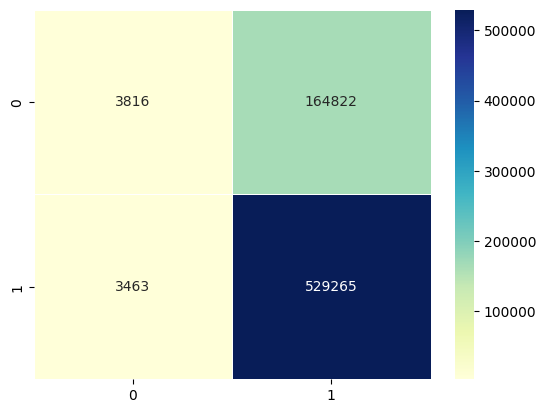

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

### Decision Trees

DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

           0       0.56      0.30      0.39    168638
           1       0.81      0.93      0.86    532728

    accuracy                           0.78    701366
   macro avg       0.69      0.61      0.63    701366
weighted avg       0.75      0.78      0.75    701366

[[ 51122 117516]
 [ 39726 493002]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.74507223 0.74122905 0.74395081 0.74438742 0.73990514 0.7168075
 0.71048689 0.72888621 0.71867522 0.73414021]

Final Average Accuracy of the model: 0.73


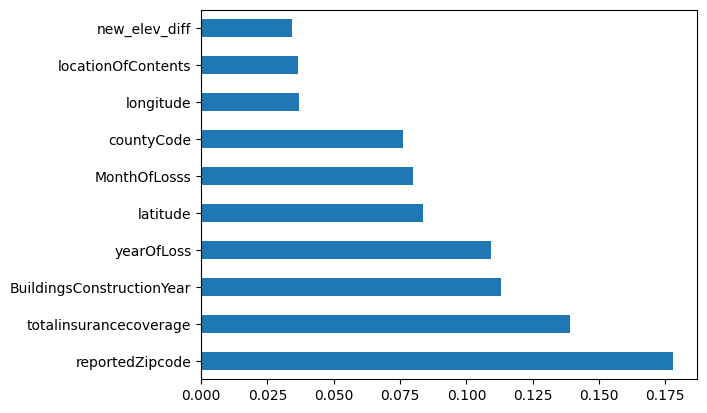

In [40]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Random Forest (Bagging of multiple Decision Trees)

RandomForestClassifier(max_depth=20)
              precision    recall  f1-score   support

           0       0.73      0.16      0.26    168638
           1       0.79      0.98      0.87    532728

    accuracy                           0.78    701366
   macro avg       0.76      0.57      0.57    701366
weighted avg       0.77      0.78      0.73    701366

[[ 26762 141876]
 [  9929 522799]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.72820712 0.71678454 0.72909264 0.72273674 0.71606319 0.70934252
 0.69882785 0.69721661 0.69998662 0.71533793]

Final Average Accuracy of the model: 0.71


<AxesSubplot:>

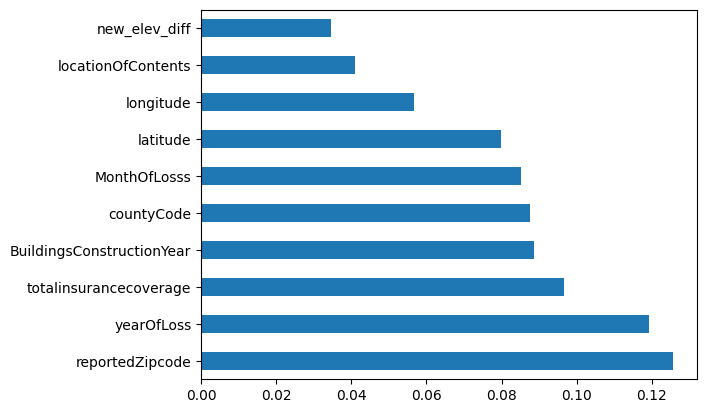

In [14]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=20, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 25, 30, 35, 50]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='gini', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    #cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    #plot_confusion_matrix(cm_norm,classes=rf.classes_,y_test,prediction_test)
   
    #plot_confusion_matrix(rf,X_test, y_test)
    #title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

Classification accuracy on test set with max features = 1 and max_depth = None: 0.782
Classification accuracy on test set with max features = 1 and max_depth = 25: 0.761
Classification accuracy on test set with max features = 1 and max_depth = 30: 0.767
Classification accuracy on test set with max features = 1 and max_depth = 35: 0.777
Classification accuracy on test set with max features = 1 and max_depth = 50: 0.791
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.784
Classification accuracy on test set with max features = sqrt and max_depth = 25: 0.792
Classification accuracy on test set with max features = sqrt and max_depth = 30: 0.795
Classification accuracy on test set with max features = sqrt and max_depth = 35: 0.793
Classification accuracy on test set with max features = sqrt and max_depth = 50: 0.785
Classification accuracy on test set with max features = log2 and max_depth = None: 0.783
Classification accuracy on test set with max feature

#### I run a new model based on the best outcome from Random Forest Tunning

In [15]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=35, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[ 51661 116977]
 [ 28281 504447]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.65      0.31      0.42    168638
           1       0.81      0.95      0.87    532728

    accuracy                           0.79    701366
   macro avg       0.73      0.63      0.64    701366
weighted avg       0.77      0.79      0.76    701366



=== All AUC Scores ===
[0.75758659 0.74080555 0.74442913 0.74638811 0.72522511 0.68078424
 0.66813939 0.73469769 0.6770782  0.73131758]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7206451588692131
